In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

## Loading the data


In [11]:
df = pd.read_csv('Sensor_record_20180913_191305_AndroSensor.csv', sep=';', skiprows=1)
df.head()

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),...,LOCATION Latitude :,LOCATION Longitude :,LOCATION Altitude ( m),LOCATION Altitude-google ( m),LOCATION Speed ( Kmh),LOCATION Accuracy ( m),LOCATION ORIENTATION (°),Satellites in range,Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS
0,-0.0491,0.0264,7.8082,-0.3705,0.5810,9.7824,0.3971,-0.2343,-1.7300,-0.5404,...,23.069056,72.54538,0.0,NaN,0.0,27.702,0.0,0 / 0,10,2018-09-13 19:04:11:160
1,0.6650,0.8823,10.8423,0.0542,1.8389,9.6325,0.4020,-1.0010,1.5440,0.4526,...,23.069056,72.54538,0.0,NaN,0.0,27.702,0.0,0 / 0,509,2018-09-13 19:04:11:659
2,-0.6788,2.9682,8.9987,-0.6651,2.2427,9.5236,-0.0307,0.7533,0.2723,-0.0816,...,23.069056,72.54538,0.0,NaN,0.0,27.702,0.0,0 / 0,1009,2018-09-13 19:04:12:159
3,-1.2247,3.5782,6.6793,-0.6408,4.0043,8.9289,0.2420,-1.0199,-2.4131,0.4371,...,23.069056,72.54538,0.0,NaN,0.0,27.702,0.0,0 / 0,1509,2018-09-13 19:04:12:659
4,-0.0635,3.7888,7.0313,-0.3829,3.8995,8.9899,0.7743,-0.8244,2.1955,-0.4687,...,23.068987,72.54518,0.0,NaN,0.0,27.419,0.0,0 / 0,2009,2018-09-13 19:04:13:159


## Divide the data into frames

In [73]:
print(df.describe())
print(df.shape)
#frames = np.ceil(df.shape[0]/50)
frames = df.shape[0]//50 #create bins of size 50
print(frames)

       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count             1069.000000             1069.000000             1069.000000   
mean                -0.353351                5.466375                7.837510   
std                  1.072434                1.626456                1.512823   
min                 -5.358300                0.026400                4.123500   
25%                 -1.005600                4.468200                6.763100   
50%                 -0.347800                5.639600                7.654400   
75%                  0.342300                6.712800                8.756900   
max                  2.697600                9.161400               13.611700   

       GRAVITY X (m/s²)  GRAVITY Y (m/s²)  GRAVITY Z (m/s²)  \
count       1069.000000       1069.000000       1069.000000   
mean          -0.421404          5.527357          7.864714   
std            0.821375          1.434301          0.926752   
min           -5.1

## Frames of size 50

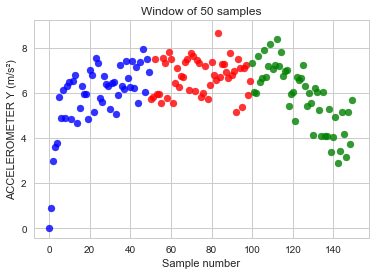

In [132]:
framedf = np.array_split(df[:frames*50], frames)
fig, ax = plt.subplots()
ax.scatter(framedf[0].index, framedf[0]['ACCELEROMETER Y (m/s²)'], color="blue", alpha=0.8)
ax.scatter(framedf[1].index, framedf[1]['ACCELEROMETER Y (m/s²)'], color="red", alpha=0.8)
ax.scatter(framedf[2].index, framedf[2]['ACCELEROMETER Y (m/s²)'], color="green", alpha=0.8)
ax.set_xlabel("Sample number")
ax.set_ylabel("ACCELEROMETER Y (m/s²)")
ax.set_title("Window of 50 samples")
plt.show()

In [75]:
#framedf = np.array_split(df, frames)
#framedf = [df.loc[idx] for idx in np.split(df.index,50)]
#framedf = np.array_split(df[:frames*50], frames)
arr = []
batchdf = framedf 
for f in batchdf:
    f.reset_index(inplace=True)
    arr.append(f.shape[0])
print(batchdf[0].describe())
print(batchdf[1].describe())
#print(batchdf[-1].head())
#arr

          index  ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  \
count  50.00000               50.000000               50.000000   
mean   24.50000               -0.151872                5.854488   
std    14.57738                0.884564                1.531569   
min     0.00000               -1.859700                0.026400   
25%    12.25000               -0.717875                5.300500   
50%    24.50000               -0.302300                6.243250   
75%    36.75000                0.393825                6.776075   
max    49.00000                2.045800                7.918200   

       ACCELEROMETER Z (m/s²)  GRAVITY X (m/s²)  GRAVITY Y (m/s²)  \
count               50.000000         50.000000         50.000000   
mean                 7.809756         -0.215106          5.929710   
std                  1.345228          0.435219          1.298130   
min                  5.464900         -1.007100          0.581000   
25%                  6.890600         -0.563925    

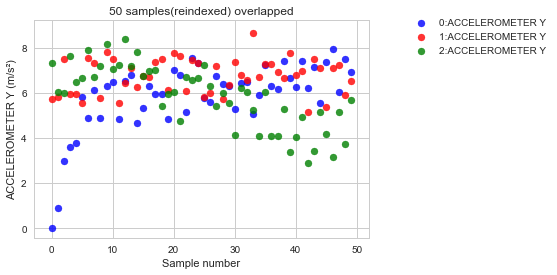

In [130]:
fig, ax = plt.subplots()
ax.scatter(batchdf[0].index, batchdf[0]['ACCELEROMETER Y (m/s²)'], color="blue", alpha=0.8, label="0:ACCELEROMETER Y")
ax.scatter(batchdf[1].index, batchdf[1]['ACCELEROMETER Y (m/s²)'], color="red", alpha=0.8, label="1:ACCELEROMETER Y")
ax.scatter(batchdf[2].index, batchdf[2]['ACCELEROMETER Y (m/s²)'], color="green", alpha=0.8, label="2:ACCELEROMETER Y")
ax.set_xlabel("Sample number")
ax.set_ylabel("ACCELEROMETER Y (m/s²)")
ax.set_title("50 samples(reindexed) overlapped")
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

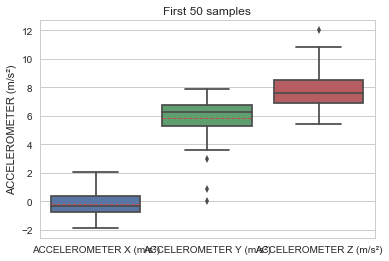

In [148]:
ax = sns.boxplot(data=batchdf[0].loc[:, 'ACCELEROMETER X (m/s²)':'ACCELEROMETER Z (m/s²)'], meanline=True, showmeans=True)
ax.set_ylabel("ACCELEROMETER (m/s²)")
ax.set_title("First 50 samples")

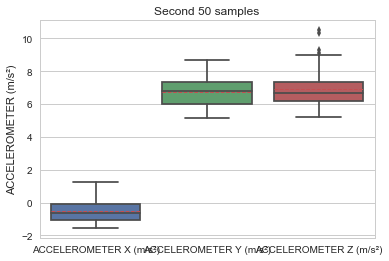

In [149]:
ax = sns.boxplot(data=batchdf[1].loc[:, 'ACCELEROMETER X (m/s²)':'ACCELEROMETER Z (m/s²)'], meanline=True, showmeans=True)
ax.set_ylabel("ACCELEROMETER (m/s²)")
ax.set_title("Second 50 samples")

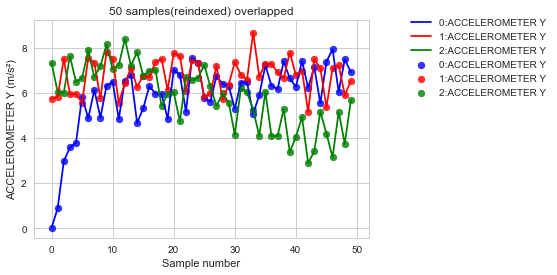

In [140]:
fig, ax = plt.subplots()
ax.scatter(batchdf[0].index, batchdf[0]['ACCELEROMETER Y (m/s²)'], color="blue", alpha=0.8, label="0:ACCELEROMETER Y")
ax.plot(batchdf[0].index, batchdf[0]['ACCELEROMETER Y (m/s²)'], color="blue", label="0:ACCELEROMETER Y")
ax.scatter(batchdf[1].index, batchdf[1]['ACCELEROMETER Y (m/s²)'], color="red", alpha=0.8, label="1:ACCELEROMETER Y")
ax.plot(batchdf[1].index, batchdf[1]['ACCELEROMETER Y (m/s²)'], color="red", label="1:ACCELEROMETER Y")
ax.scatter(batchdf[2].index, batchdf[2]['ACCELEROMETER Y (m/s²)'], color="green", alpha=0.8, label="2:ACCELEROMETER Y")
ax.plot(batchdf[2].index, batchdf[2]['ACCELEROMETER Y (m/s²)'], color="green", label="2:ACCELEROMETER Y")
ax.set_xlabel("Sample number")
ax.set_ylabel("ACCELEROMETER Y (m/s²)")
ax.set_title("50 samples(reindexed) overlapped")

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

## Divide the data based on time

In [66]:
#list(df)
counter = 0
for i in range(df.shape[0]):
    if df['Time since start in ms '][i]<10000:
        counter+=1
    else:
        break
counter

20

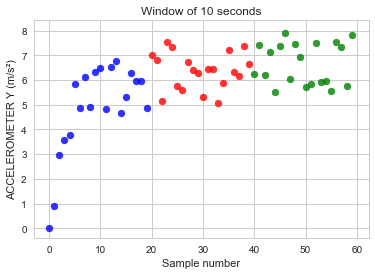

In [122]:
tframes = df.shape[0]//counter #ccreate bins of size 20
tframedf = np.array_split(df[:tframes*counter], tframes)
fig, ax = plt.subplots()
ax.scatter(tframedf[0].index, tframedf[0]['ACCELEROMETER Y (m/s²)'], color="blue", alpha=0.8)
ax.scatter(tframedf[1].index, tframedf[1]['ACCELEROMETER Y (m/s²)'], color="red", alpha=0.8)
ax.scatter(tframedf[2].index, tframedf[2]['ACCELEROMETER Y (m/s²)'], color="green", alpha=0.8)
ax.set_xlabel("Sample number")
ax.set_ylabel("ACCELEROMETER Y (m/s²)")
ax.set_title("Window of 10 seconds")
plt.show()

In [76]:
tarr = []
tbatchdf = tframedf 
for f in tbatchdf:
    f.reset_index(inplace=True)
    tarr.append(f.shape[0]);
#tarr
print(tbatchdf[0].describe())
print(tbatchdf[1].describe())

        level_0     index  ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  \
count  20.00000  20.00000               20.000000               20.000000   
mean    9.50000   9.50000               -0.457205                4.847470   
std     5.91608   5.91608                0.736898                1.835932   
min     0.00000   0.00000               -1.859700                0.026400   
25%     4.75000   4.75000               -1.008300                4.446025   
50%     9.50000   9.50000               -0.425350                5.103850   
75%    14.25000  14.25000               -0.049550                6.162700   
max    19.00000  19.00000                1.245600                6.789400   

       ACCELEROMETER Z (m/s²)  GRAVITY X (m/s²)  GRAVITY Y (m/s²)  \
count               20.000000         20.000000         20.000000   
mean                 8.174310         -0.418155          5.091180   
std                  1.252493          0.358873          1.714718   
min                  6.665600 

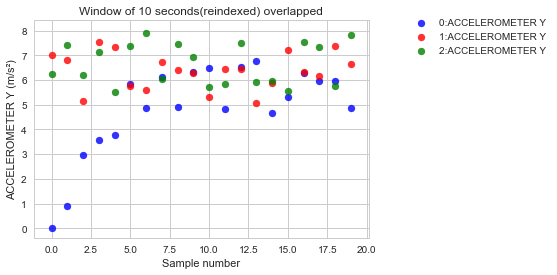

In [136]:
fig, ax = plt.subplots()
ax.scatter(tbatchdf[0].index, tbatchdf[0]['ACCELEROMETER Y (m/s²)'], color="blue", alpha=0.8, label="0:ACCELEROMETER Y")
ax.scatter(tbatchdf[1].index, tbatchdf[1]['ACCELEROMETER Y (m/s²)'], color="red", alpha=0.8, label="1:ACCELEROMETER Y")
ax.scatter(tbatchdf[2].index, tbatchdf[2]['ACCELEROMETER Y (m/s²)'], color="green", alpha=0.8, label="2:ACCELEROMETER Y")
ax.set_xlabel("Sample number")
ax.set_ylabel("ACCELEROMETER Y (m/s²)")
ax.set_title("Window of 10 seconds(reindexed) overlapped")

ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

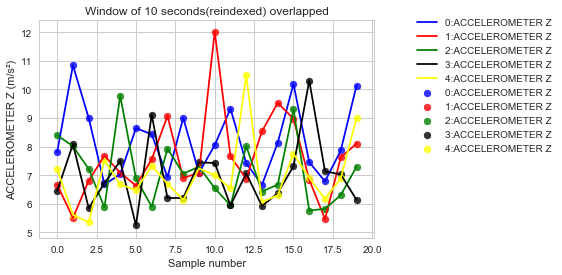

In [141]:
fig, ax = plt.subplots()
ax.scatter(tbatchdf[0].index, tbatchdf[0]['ACCELEROMETER Z (m/s²)'], color="blue", alpha=0.8, label="0:ACCELEROMETER Z")
ax.plot(tbatchdf[0].index, tbatchdf[0]['ACCELEROMETER Z (m/s²)'], color="blue", label="0:ACCELEROMETER Z")
ax.scatter(tbatchdf[1].index, tbatchdf[1]['ACCELEROMETER Z (m/s²)'], color="red", alpha=0.8, label="1:ACCELEROMETER Z")
ax.plot(tbatchdf[1].index, tbatchdf[1]['ACCELEROMETER Z (m/s²)'], color="red", label="1:ACCELEROMETER Z")
ax.scatter(tbatchdf[2].index, tbatchdf[2]['ACCELEROMETER Z (m/s²)'], color="green", alpha=0.8, label="2:ACCELEROMETER Z")
ax.plot(tbatchdf[2].index, tbatchdf[2]['ACCELEROMETER Z (m/s²)'], color="green", label="2:ACCELEROMETER Z")
ax.scatter(tbatchdf[3].index, tbatchdf[3]['ACCELEROMETER Z (m/s²)'], color="black", alpha=0.8, label="3:ACCELEROMETER Z")
ax.plot(tbatchdf[3].index, tbatchdf[3]['ACCELEROMETER Z (m/s²)'], color="black", label="3:ACCELEROMETER Z")
ax.scatter(tbatchdf[4].index, tbatchdf[4]['ACCELEROMETER Z (m/s²)'], color="yellow", alpha=0.8, label="4:ACCELEROMETER Z")
ax.plot(tbatchdf[4].index, tbatchdf[4]['ACCELEROMETER Z (m/s²)'], color="yellow", label="4:ACCELEROMETER Z")
ax.set_xlabel("Sample number")
ax.set_ylabel("ACCELEROMETER Z (m/s²)")
ax.set_title("Window of 10 seconds(reindexed) overlapped")
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

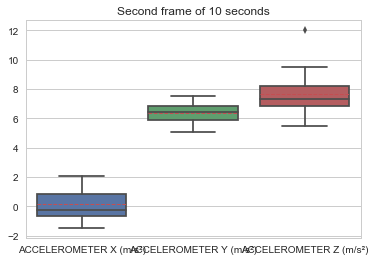

In [150]:
ax = sns.boxplot(data=tbatchdf[1].loc[:, 'ACCELEROMETER X (m/s²)':'ACCELEROMETER Z (m/s²)'], meanline=True, showmeans=True)
ax.set_title("Second frame of 10 seconds")

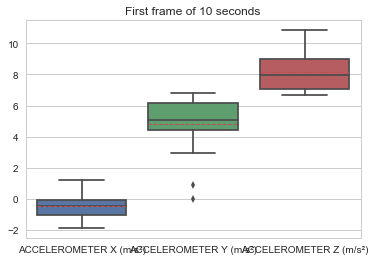

In [151]:
ax = sns.boxplot(data=tbatchdf[0].loc[:, 'ACCELEROMETER X (m/s²)':'ACCELEROMETER Z (m/s²)'], showmeans=True, meanline=True)
ax.set_title("First frame of 10 seconds")

## To synchronize signals of two different time series:
    we will take the union of the both signals' indices (newindex = df1.index.union(df2.index)), 
    then we will use linear interpolation to fill the missing values(interpolate(method='time')) 
    and then we will resample them using our new timeseries index(df = df.reindex(newindex)).
    
    But in our case all the sensor data is collected at the same time, so we don't need to synchronize them.